<a href="https://colab.research.google.com/github/AlvinMaul/uts-pengolahan-citra_Muhammad-Alvin-Maulana_237006516072/blob/main/Latihan_1_Muhammad_Alvin_Maulana_237006516072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
import requests
from PIL import Image
from io import BytesIO


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

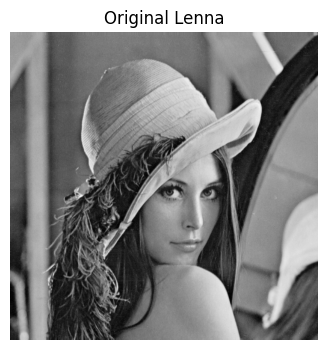

In [ ]:
# Link citra Lenna
url = "https://raw.githubusercontent.com/lenna-project/ultraface-plugin/main/assets/lenna.png"

# Download
response = requests.get(url)
img = np.array(Image.open(BytesIO(response.content)).convert('L'))  # convert to grayscale

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title("Original Lenna")
plt.axis('off')


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

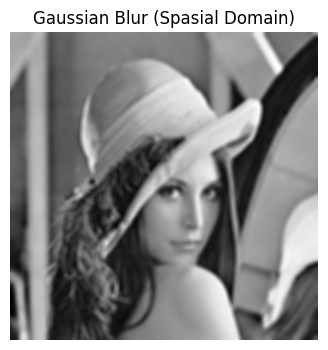

In [ ]:
# Gaussian blur spatial domain
spatial_blur = cv2.GaussianBlur(img, (9, 9), sigmaX=5)

plt.figure(figsize=(4,4))
plt.imshow(spatial_blur, cmap='gray')
plt.title("Gaussian Blur (Spasial Domain)")
plt.axis('off')


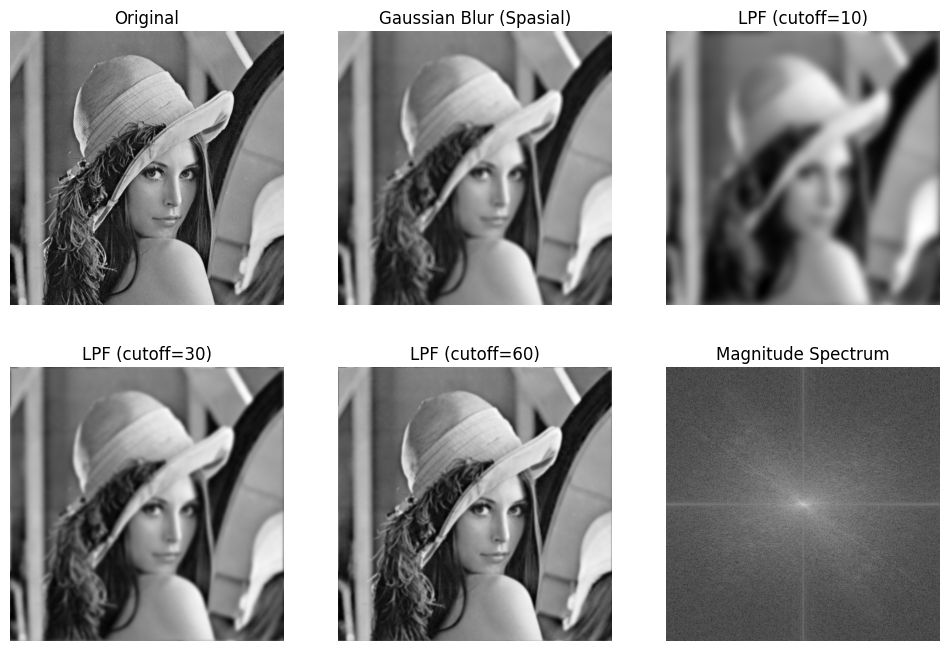

In [ ]:
def gaussian_lpf(shape, cutoff):
    h, w = shape
    u, v = np.meshgrid(np.arange(w), np.arange(h))
    du = u - w/2
    dv = v - h/2
    D = np.sqrt(du**2 + dv**2)
    H = np.exp(-(D**2) / (2*(cutoff**2)))
    return H

def apply_lpf(image, cutoff):
    F = np.fft.fft2(image)
    Fshift = np.fft.fftshift(F)

    H = gaussian_lpf(image.shape, cutoff)
    G = Fshift * H

    ishift = np.fft.ifftshift(G)
    filtered = np.fft.ifft2(ishift)
    filtered = np.abs(filtered)

    return filtered, np.log(1 + np.abs(Fshift))

cutoffs = [10, 30, 60]
lpf_results = {}

for c in cutoffs:
    out, spectrum = apply_lpf(img, c)
    lpf_results[c] = (out, spectrum)

plt.figure(figsize=(12,8))
plt.subplot(2,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(2,3,2); plt.imshow(spatial_blur, cmap='gray'); plt.title("Gaussian Blur (Spasial)"); plt.axis('off')
plt.subplot(2,3,3); plt.imshow(lpf_results[10][0], cmap='gray'); plt.title("LPF (cutoff=10)"); plt.axis('off')
plt.subplot(2,3,4); plt.imshow(lpf_results[30][0], cmap='gray'); plt.title("LPF (cutoff=30)"); plt.axis('off')
plt.subplot(2,3,5); plt.imshow(lpf_results[60][0], cmap='gray'); plt.title("LPF (cutoff=60)"); plt.axis('off')
plt.subplot(2,3,6); plt.imshow(lpf_results[30][1], cmap='gray'); plt.title("Magnitude Spectrum"); plt.axis('off')
plt.show()



In [ ]:
def evaluate(original, processed):
    mse = mean_squared_error(original, processed)
    psnr = peak_signal_noise_ratio(original, processed, data_range=255)
    ssim = structural_similarity(original, processed, data_range=255)
    return mse, psnr, ssim

print("=== METRIK KUALITAS ===")
print("Spasial Gaussian Blur:", evaluate(img, spatial_blur))

for c in cutoffs:
    print(f"Gaussian LPF (cutoff={c}):", evaluate(img, lpf_results[c][0]))


=== METRIK KUALITAS ===
Spasial Gaussian Blur: (np.float64(142.55899810791016), np.float64(26.590857263477755), np.float64(0.7568140532275163))
Gaussian LPF (cutoff=10): (np.float64(467.71014275687526), np.float64(21.43103572752053), np.float64(0.592779810774345))
Gaussian LPF (cutoff=30): (np.float64(149.72582798579782), np.float64(26.37783637450827), np.float64(0.7609289074455396))
Gaussian LPF (cutoff=60): (np.float64(58.11598034697289), np.float64(30.48784792638683), np.float64(0.8791499508023383))


In [ ]:
print("\n=== ANALISIS HASIL LATIHAN 1 ===")
print("""
• Gaussian blur (spasial) menghasilkan blur yang halus karena filter bekerja langsung pada pixel.
• Gaussian LPF (frekuensi) juga menghasilkan blur, tetapi efeknya tergantung cutoff:
   - cutoff kecil (10): blur sangat kuat, detail hampir hilang.
   - cutoff sedang (30): blur sedang, wajah masih terlihat jelas.
   - cutoff besar (60): blur ringan, hampir seperti gambar original.
• Perbedaan utama:
   - Spasial blur dipengaruhi sigma (semakin besar, semakin blur).
   - Frekuensi blur dipengaruhi cutoff (semakin kecil cutoff → semakin blur).
• Blur domain frekuensi cenderung lebih global, sementara domain spasial lebih lokal.
""")



=== ANALISIS HASIL LATIHAN 1 ===

• Gaussian blur (spasial) menghasilkan blur yang halus karena filter bekerja langsung pada pixel.
• Gaussian LPF (frekuensi) juga menghasilkan blur, tetapi efeknya tergantung cutoff:
   - cutoff kecil (10): blur sangat kuat, detail hampir hilang.
   - cutoff sedang (30): blur sedang, wajah masih terlihat jelas.
   - cutoff besar (60): blur ringan, hampir seperti gambar original.
• Perbedaan utama:
   - Spasial blur dipengaruhi sigma (semakin besar, semakin blur).
   - Frekuensi blur dipengaruhi cutoff (semakin kecil cutoff → semakin blur).
• Blur domain frekuensi cenderung lebih global, sementara domain spasial lebih lokal.

